In [1]:

%reload_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

from qick import *
from qick.helpers import gauss
from tqdm import tqdm_notebook as tqdm

import time
import os
import sys
sys.path.append('/home/xilinx/jupyter_notebooks/')
sys.path.append('C:\\_Lib\\python\\rfsoc\\rfsoc_multimode\\example_expts')
import scipy as sp
import json
from scipy.fft import fft, fftfreq

from slab.instruments import *
from slab.experiment import Experiment
from slab.datamanagement import SlabFile
from slab import get_next_filename, AttrDict
from slab import Experiment, dsfit, AttrDict

# Figure params
plt.rcParams['figure.figsize'] = [10,6]
plt.rcParams.update({'font.size': 14})

Warning serial library import failed.
Could not load InstrumentManagerWindow
Could not import QickInstrument, try install qick package
Could not load AD5780 dac 
Could not load labbrick
Could not load Autonics TM4 Driver


In [2]:
from slab.dsfit import *
import os
from scipy.interpolate import griddata
from numpy import mgrid, array, zeros,abs,pi,cos,transpose, linspace
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from tempfile import TemporaryFile
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 15}
import json
from h5py import File
from datetime import datetime
import time
from slab.datamanagement import SlabFile
import matplotlib.pyplot as plt
import numpy as np
import os
import json
from slab.dsfit import *
from scipy.optimize import curve_fit
# import experiments.fitting as fitter
from matplotlib.colors import Normalize

## Import modules from parent and multimode expts

In [3]:
import json
import os

# Get the current working directory
path = os.getcwd()
print("Current Path:", path)

# Isolate the parent directory
parent_path = os.path.dirname(path)
print("Parent Path:", parent_path)

# Add the parent path to the sys.path
sys.path.append(parent_path)

Current Path: c:\_Lib\python\multimode_expts\analysis_notebooks
Parent Path: c:\_Lib\python\multimode_expts


In [4]:
import sys

# Path to add
expts_path = 'C:\\_Lib\\python\\multimode_expts'

# Add the path to the system path at the highest priority
if expts_path not in sys.path:
    sys.path.insert(0, expts_path)
    print('Path added at highest priority')

# Verify the path is added
print(sys.path)


Path added at highest priority
['C:\\_Lib\\python\\multimode_expts', 'c:\\_Lib\\python\\multimode_expts\\analysis_notebooks', 'C:\\_Lib\\python', 'C:\\_Lib\\python\\slab', 'C:\\_Lib\\python\\qick\\qick_lib', 'C:\\_Lib\\python\\rfsoc\\rfsoc_multimode\\example_expts', 'c:\\_Lib\\python\\multimode_expts\\analysis_notebooks', 'c:\\Users\\26049\\.conda\\envs\\slab\\python38.zip', 'c:\\Users\\26049\\.conda\\envs\\slab\\DLLs', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib', 'c:\\Users\\26049\\.conda\\envs\\slab', '', 'C:\\Users\\26049\\AppData\\Roaming\\Python\\Python38\\site-packages', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\site-packages', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\site-packages\\easy_lmfit-1.0-py3.8.egg', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\site-packages\\attrdict-2.0.1-py3.8.egg', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\site-packages\\win32', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\site-packages\\win32\\lib', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\s

In [5]:
from multimode_expts.fit_display import *

importing from path  C:\_Lib\python\multimode_expts\experiments\clifford_averager_program.py
imported experiments.clifford_averager_program
importing from path  C:\_Lib\python\multimode_expts\experiments\fitting.py
imported experiments.fitting
importing from path  C:\_Lib\python\multimode_expts\experiments\qram_protocol_timestepped.py
imported experiments.qram_protocol_timestepped
importing from path  C:\_Lib\python\multimode_expts\experiments\qubit_cavity
imported experiments.qubit_cavity.amplitude_rabi_f0g1
imported experiments.qubit_cavity.displacement_enhanced_sideband
imported experiments.qubit_cavity.displace_amplitude_calibration
imported experiments.qubit_cavity.displace_pulse_probe
imported experiments.qubit_cavity.ecd
imported experiments.qubit_cavity.ecd_backup
imported experiments.qubit_cavity.ecd_read_spec
imported experiments.qubit_cavity.non_demolution_readout
imported experiments.qubit_cavity.out_and_back
imported experiments.qubit_cavity.photo_resolved_pulse_probe
impo

In [6]:
import experiments.fitting as fitter
from numpy.linalg import inv

# Exp path

In [7]:

# print("path: ", path)

"""Reopen saved data"""
def prev_data(expt_path, filename):
    temp_data_file = expt_path+'\\'+filename
    with SlabFile(temp_data_file) as a:
        attrs = dict()
        for key in list(a.attrs):
            attrs.update({key:json.loads(a.attrs[key])})
        keys = list(a)
        temp_data = dict()
        for key in keys:
            temp_data.update({key:np.array(a[key])})
        # print(f'Extracted data and attrs {list(a.attrs)}')
    return temp_data, attrs

data_parent =  r'H:\Shared drives\SLab\Multimode\experiment\240911'
expt_path=data_parent+'\\data1'
print('Data are extracted from', expt_path)

Data are extracted from H:\Shared drives\SLab\Multimode\experiment\240911\data1


# Cross Kerrs

In [11]:
cross_kerrs = [[ 0.00000000e+00, 2.69516637e-04, 1.26486438e-04, 8.86845176e-05, 4.26936404e-05, 1.94041328e-05, -1.95956248e-05], [-1.77543592e-04, 0.00000000e+00, -6.92266452e-05, -7.10978126e-05, 1.37913777e-05, -2.56223707e-05, 9.10903529e-07], [-7.56355942e-05, -4.42189013e-05, 0.00000000e+00, -2.45449305e-05, -4.28864355e-06, 2.24512793e-06, -3.33552244e-06], [ 6.10648017e-05, 4.56428583e-05, 1.96973208e-05, 0.00000000e+00, 2.41548015e-06, -1.08904643e-05, -6.20592017e-06], [-3.72488668e-05, -4.62192947e-05, -3.77809419e-05, -1.58034621e-05, 0.00000000e+00, -2.52649638e-05, -2.20498490e-06], [-4.31597553e-05, -1.65832342e-05, -4.06943788e-05, 1.21448311e-05, -1.92766876e-05, 0.00000000e+00, 1.27297852e-05], [-5.42085347e-06, -3.00407857e-05, -7.10933782e-06, -2.45232181e-05, 8.53857371e-06, -1.07023464e-05, 0.00000000e+00]]
cross_kerrs = np.array(cross_kerrs)
print(cross_kerrs)

[[ 0.00000000e+00  2.69516637e-04  1.26486438e-04  8.86845176e-05
   4.26936404e-05  1.94041328e-05 -1.95956248e-05]
 [-1.77543592e-04  0.00000000e+00 -6.92266452e-05 -7.10978126e-05
   1.37913777e-05 -2.56223707e-05  9.10903529e-07]
 [-7.56355942e-05 -4.42189013e-05  0.00000000e+00 -2.45449305e-05
  -4.28864355e-06  2.24512793e-06 -3.33552244e-06]
 [ 6.10648017e-05  4.56428583e-05  1.96973208e-05  0.00000000e+00
   2.41548015e-06 -1.08904643e-05 -6.20592017e-06]
 [-3.72488668e-05 -4.62192947e-05 -3.77809419e-05 -1.58034621e-05
   0.00000000e+00 -2.52649638e-05 -2.20498490e-06]
 [-4.31597553e-05 -1.65832342e-05 -4.06943788e-05  1.21448311e-05
  -1.92766876e-05  0.00000000e+00  1.27297852e-05]
 [-5.42085347e-06 -3.00407857e-05 -7.10933782e-06 -2.45232181e-05
   8.53857371e-06 -1.07023464e-05  0.00000000e+00]]


# Mode Bare Ramsey Dataset

In [12]:
folder = os.path.join(data_parent, 'RAM_paper_results', 'datasets')
file_name = 'ModeT2s_and_echoes.csv'
file_path = os.path.join(folder, file_name)

# Ensure the directory exists
os.makedirs(folder, exist_ok=True)

# Save the DataFrame to a CSV file
df_t2_and_echo = pd.read_csv(file_path)

print(f"DataFrame read from to {file_path}")

DataFrame read from to H:\Shared drives\SLab\Multimode\experiment\240911\RAM_paper_results\datasets\ModeT2s_and_echoes.csv


In [13]:
df_t2_and_echo

,target,type,file_no,name,t2,t2_err,return_args
0,1,T2,90,_stor_cavity_ramsey_sweep.h5,235.687931,7.102034,"[[1.8099999999999998, 3.6099999999999994, 5.40..."
1,1,T2_echo,91,_stor_cavity_ramsey_sweep.h5,551.567706,16.846464,"[[3.02, 6.02, 9.02, 12.02, 15.02, 18.02, 21.02..."
2,2,T2,92,_stor_cavity_ramsey_sweep.h5,378.310633,15.076063,"[[6.01, 12.01, 18.01, 24.01, 30.01, 36.01, 42...."
3,2,T2_echo,93,_stor_cavity_ramsey_sweep.h5,1493.194215,53.469139,NaN
4,3,T2,94,_stor_cavity_ramsey_sweep.h5,677.194120,16.847612,"[[4.81, 9.61, 14.409999999999998, 19.21, 24.01..."
5,3,T2_echo,95,_stor_cavity_ramsey_sweep.h5,1309.914525,41.804243,"[[8.02, 16.02, 24.02, 32.02, 40.02, 48.02, 56...."
6,4,T2,96,_stor_cavity_ramsey_sweep.h5,806.227803,23.684860,"[[4.21, 8.41, 12.610000000000001, 16.810000000..."
7,4,T2_echo,97,_stor_cavity_ramsey_sweep.h5,972.376941,29.846202,"[[7.02, 14.02, 21.02, 28.02, 35.02, 42.02, 49...."
8,5,T2,98,_stor_cavity_ramsey_sweep.h5,591.843259,15.246132,"[[3.6099999999999994, 7.209999999999999, 10.80..."
9,5,T2_echo,99,_stor_cavity_ramsey_sweep.h5,663.338928,22.742345,"[[6.02, 12.02, 18.02, 24.02, 30.02, 36.02, 42...."


### Many Body dephasing dataset

In [14]:
# save dataframe
folder = os.path.join(data_parent, 'RAM_paper_results', 'datasets')
file_name = 'ManyBodyDephasing.csv'
file_path = os.path.join(folder, file_name)

# Ensure the directory exists
os.makedirs(folder, exist_ok=True)

# Save the DataFrame to a CSV file
df_MBD = pd.read_csv(file_path)

print(f"DataFrame read from to {file_path}")
df_MBD

DataFrame read from to H:\Shared drives\SLab\Multimode\experiment\240911\RAM_paper_results\datasets\ManyBodyDephasing.csv


,Unnamed: 0,target,state_idx,file_no,name,t2,t2_err,p,pCov,xdata,idata
0,0,1,0,90,_stor_cavity_ramsey_sweep.h5,278.042230,10.884967,[ 3.24240150e+02 2.80972092e-02 -3.74620490e+...,[[ 1.09038088e+16 -9.54145116e+01 3.11069106e...,[ 1.81 3.61 5.41 7.21 9.01 10.81 12...,"[-132.15446674537586, -81.4926948051948, -25.3..."
1,1,1,1,22,_stor_cavity_ramsey_sweep.h5,290.866341,13.154786,[ 3.17205254e+02 2.81728391e-02 -4.34467770e+...,[[ 1.15052670e+16 8.32883738e+01 -2.68473223e...,[ 1.51 3.01 4.51 6.01 7.51 9.01 10...,"[-134.0004214852085, -86.87475864257942, -30.3..."
2,2,1,2,23,_stor_cavity_ramsey_sweep.h5,220.500000,inf,"[352.61802854947564, 0.02252252252252253, -53....",[[inf inf inf inf inf inf]\n [inf inf inf inf ...,[ 1.51 3.01 4.51 6.01 7.51 9.01 10...,"[-128.49311135112353, -95.4091829223408, -55.4..."
3,3,1,3,24,_stor_cavity_ramsey_sweep.h5,285.860033,12.445693,[ 2.98245751e+02 2.77988125e-02 -4.43351771e+...,[[ 1.34342862e+16 -1.15520991e+02 1.90671907e...,[ 1.51 3.01 4.51 6.01 7.51 9.01 10...,"[-137.93075129738415, -83.48585016593066, -20...."
4,4,1,4,25,_stor_cavity_ramsey_sweep.h5,220.500000,inf,"[382.4504166493798, 0.02252252252252253, 59.50...",[[inf inf inf inf inf inf]\n [inf inf inf inf ...,[ 1.51 3.01 4.51 6.01 7.51 9.01 10...,"[-142.45235487404165, -111.91995732462264, -26..."
5,5,1,5,26,_stor_cavity_ramsey_sweep.h5,281.408727,11.610525,[ 2.93444476e+02 2.78841355e-02 -4.88712750e+...,[[ 7.76562395e+15 1.47040584e+02 -5.77985856e...,[ 1.51 3.01 4.51 6.01 7.51 9.01 10...,"[-141.12335001064508, -85.12480121918897, -27...."
6,6,2,0,92,_stor_cavity_ramsey_sweep.h5,435.249214,17.516631,[ 3.37600375e+02 9.27565314e-03 1.35714631e+...,[[ 1.49710288e+16 -8.38181627e+01 8.60808244e...,[ 6.01 12.01 18.01 24.01 30.01 36.01 42...,"[3.4405705856010123, -45.609278879015726, -131..."
7,7,2,1,30,_stor_cavity_ramsey_sweep.h5,480.860541,14.388364,[ 3.43782520e+02 9.30490906e-03 1.30964766e+...,[[ 3.47693459e+01 5.33715223e-07 -3.62759335e...,[ 5.01 10.01 15.01 20.01 25.01 30.01 35...,"[76.7657297339757, 34.58518767817549, -42.9902..."
8,8,2,2,31,_stor_cavity_ramsey_sweep.h5,467.648602,21.497076,[ 2.77361608e+02 9.02182481e-03 1.19233027e+...,[[ 5.98011256e+01 -4.42052116e-06 4.37817552e...,[ 5.01 10.01 15.01 20.01 25.01 30.01 35...,"[79.25604201524446, 61.97823619469962, -19.346..."
9,9,2,3,32,_stor_cavity_ramsey_sweep.h5,479.399206,17.607957,[ 3.12239323e+02 9.14896655e-03 1.28147621e+...,[[ 4.68575825e+01 -2.81721708e-07 3.75306936e...,[ 5.01 10.01 15.01 20.01 25.01 30.01 35...,"[96.05281077948422, 43.75738619832307, -27.001..."


# Analyze Many body dephasing data

## Applying analysis 

In [28]:
import ast
def lists_in_str_without_comma(s):
    '''convert lists in string to array'''
    # Preprocess the string to insert commas between the elements
    s = s.replace("[", "").replace("]", "").strip()
    s = "[" + ", ".join(s.split()) + "]"

    # Use ast.literal_eval to convert the string to a list
    return np.array(ast.literal_eval(s))
def lists_in_str_with_comma(s):
    '''convert lists in string to array'''

    # Use ast.literal_eval to convert the string to a list
    return np.array(ast.literal_eval(s))

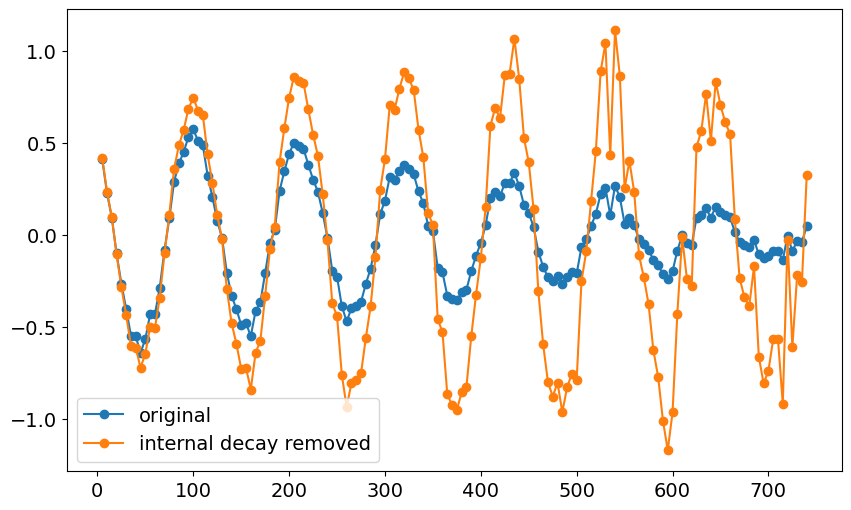

In [29]:
df_idx = 10
file_no = df_MBD.loc[df_idx, 'file_no']
name = df_MBD.loc[df_idx, 'name']
mode_no = df_MBD.loc[df_idx, 'target']
state_idx = df_MBD.loc[df_idx, 'state_idx']

spectator_cross_kerrs = np.abs(cross_kerrs[mode_no-1])
T1s = np.array([358.3, 1254.8, 799.0, 597.4, 355.7, 589.5, 371.2])
kappa = np.sum(1/T1s * np.abs(spectator_cross_kerrs/np.sum(spectator_cross_kerrs)))
effective_spec_T1 = 1/kappa

if state_idx == 0:
    alpha =0
elif state_idx == 1:
    alpha = 1
else:
    alpha = 1/2

xdata_1, idata1 = lists_in_str_without_comma(df_MBD.loc[df_idx, 'xdata']), lists_in_str_with_comma(df_MBD.loc[df_idx, 'idata'])
p, pCov = lists_in_str_without_comma(df_MBD.loc[df_idx, 'p']), lists_in_str_without_comma(df_MBD.loc[df_idx, 'pCov'])

#  # fitparams=[amp, freq (non-angular), phase (deg), decay time, amp offset, decay time offset]

#get rid of amp offset and amp 
idata1 = (idata1 - p[4])/p[0]
# plt.plot(xdata_1, idata1, '-o', label='original')

# get rid of internal kappa decay 

## find df_idx in the t2_and_echo dataframe with target being mode_no and type being T2
df_idx = df_t2_and_echo[(df_t2_and_echo['target'] == mode_no) & (df_t2_and_echo['type'] == 'T2')].index[0]
t2 = df_t2_and_echo.loc[df_idx, 't2']

factor = np.exp(xdata_1/t2)
idata1_ = np.array(idata1) * factor



# get rid of oscillations
# idata2_= idata1_/np.sin(p[1]*xdata_1 *2*np.pi +p[2]*np.pi/180)
# # remove outliers (things larger than 1)
# idata2_[idata2_>1] = 1
# idata2_[idata2_<-1] = -1

plt.plot(xdata_1, idata1, '-o', label='original')
plt.plot(xdata_1, idata1_, '-o', label='internal decay removed')
# plt.plot(xdata_1, idata2_, '-o', label='oscillations removed')
plt.legend()
p_ramsey = p.copy()


### Fitting only kappam


$f(t) = e^{-\kappa_{int} t} e^{\alpha e^{-\kappa_{s} t} \kappa_m t}$ cos($\omega t$)

where 
- $\kappa_{int}$ is the intrinsic dephasing rate (T2)
- $\kappa_{s}$ is the T1 decay (average) of spectator storage modes
- $\kappa_m$ is the effective many body dephasing rate
- $\omega$ is the ramsey frequency
- $\alpha$ is the amount of photon prepared per storage mode

In [265]:
effective_spec_T1

1151.791633849051

In [302]:
mode_no

2

In [335]:
T1s = [358.3, 1254.8, 799.0, 597.4, 355.7, 589.5, 371.2]
T1s_eff = []
for idx, T1 in enumerate(T1s):
    if idx == mode_no-1:
        pass
    else:
        T1s_eff.append(T1)
T1s_eff = np.array(T1s_eff)
T1s_eff

array([358.3, 799. , 597.4, 355.7, 589.5, 371.2])

In [343]:

def many_body_dephasing_func(x, *p, args = [0.9, 0, alpha,np.mean(T1s_eff), p_ramsey[1], p_ramsey[2]]):
    '''f(t) = yscale * sin(2*pi*freq*t + phase) * exp(-alpha * exp(-t/decay_T1) * t/decay_mbd)'''
    decay_mbd = p
    yscale, x0, alpha, decay_T1, freq, phase_deg = args
    return yscale * (np.sin(2 * np.pi * freq * x + phase_deg * np.pi / 180) 
                     * np.exp(-1* alpha* np.exp(-1* (x - x0) / decay_T1) * (x - x0) / decay_mbd))

def fit_many_body_dephasing(xdata, ydata, fitparams=None, bounds=(-np.inf, np.inf)):
    if fitparams is None:
        fitparams = [np.max(ydata), 1000, 1000, 0.1, 0, 0]

    try:
        # print(fitparams)
        # print(xdata.shape, ydata.shape)
        # print(bounds)
        avg_deviation = 1
        while avg_deviation > 0.2:
            pOpt, pCov = sp.optimize.curve_fit(many_body_dephasing_func, xdata, ydata, p0=fitparams, bounds=bounds, maxfev=10000)

            avg_deviation = np.mean(np.abs(ydata - many_body_dephasing_func(xdata, *pOpt)))
            # randomly perturb the initial guess with positive or negative
            fitparams = pOpt 
            print(avg_deviation)
            print(fitparams)
    except RuntimeError:
        print('Error - curve_fit failed')
        pOpt = fitparams
        pCov = np.zeros((len(fitparams), len(fitparams)))
    return pOpt, pCov

# Example usage
T2s = df_t2_and_echo[(df_t2_and_echo['type'] == 'T2')]['t2'].values

# Define bounds for the parameters
lower_bounds = [10]
upper_bounds = [ 5000]

# Fit the data with bounds
p_, pCov_ = fit_many_body_dephasing(xdata_1, idata1_, fitparams=[ 2000], bounds=(lower_bounds, upper_bounds))

0.12177145059538853
[1448.32612342]


decay_mbd:  1448.3261234233253 ± 126142548.40508004


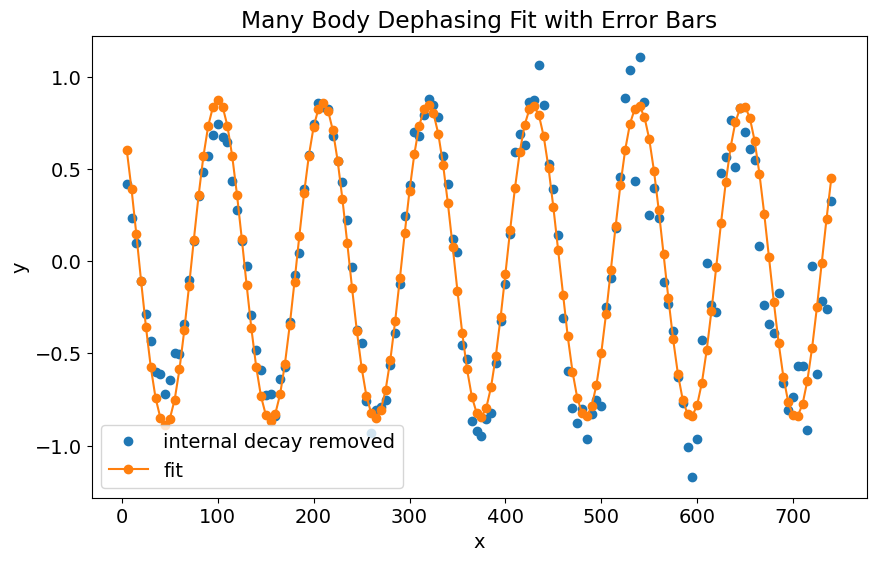

In [344]:
# Assuming pCov is the covariance matrix returned by curve_fit
# Extract the standard deviations (errors) of the parameters
p_errors = np.sqrt(np.diag(pCov))

# Plot the data with error bars
plt.plot(xdata_1, idata1_, 'o', label='internal decay removed')

# Plot the fit with error bars
plt.plot(xdata_1, many_body_dephasing_func(xdata_1, *p_), '-o', label='fit')

# Print all the parameters with their errors
# yscale, decay_T1, decay_mbd, freq, phase_deg, x0
# print('yscale: ', p_[0], '±', p_errors[0])
print('decay_mbd: ', p_[0], '±', p_errors[0])
# print('freq: ', p_[3], '±', p_errors[3])
# print('phase_deg: ', p_[4], '±', p_errors[4])
# print('x0: ', p_[2], '±', p_errors[2])

plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Many Body Dephasing Fit with Error Bars')
plt.show()

### With yscale

In [327]:


def many_body_dephasing_func(x, *p, args = [0, alpha,np.mean(T1s_eff), p_ramsey[1], p_ramsey[2]]):
    '''f(t) = yscale * sin(2*pi*freq*t + phase) * exp(-alpha * exp(-t/decay_T1) * t/decay_mbd)'''
    yscale, decay_mbd= p
    x0, alpha, decay_T1, freq, phase_deg = args
    return yscale * (np.sin(2 * np.pi * freq * x + phase_deg * np.pi / 180) 
                     * np.exp(-1* alpha* np.exp(-1* (x - x0) / decay_T1) * (x - x0) / decay_mbd))

def fit_many_body_dephasing(xdata, ydata, fitparams=None, bounds=(-np.inf, np.inf)):
    if fitparams is None:
        fitparams = [np.max(ydata), 1000, 1000, 0.1, 0, 0]

    try:
        # print(fitparams)
        # print(xdata.shape, ydata.shape)
        # print(bounds)
        avg_deviation = 1
        while avg_deviation > 0.2:
            pOpt, pCov = sp.optimize.curve_fit(many_body_dephasing_func, xdata, ydata, p0=fitparams, bounds=bounds, maxfev=10000)

            avg_deviation = np.mean(np.abs(ydata - many_body_dephasing_func(xdata, *pOpt)))
            # randomly perturb the initial guess with positive or negative
            fitparams = pOpt 
            print(avg_deviation)
            print(fitparams)
    except RuntimeError:
        print('Error - curve_fit failed')
        pOpt = fitparams
        pCov = np.zeros((len(fitparams), len(fitparams)))
    return pOpt, pCov

# Example usage
T2s = df_t2_and_echo[(df_t2_and_echo['type'] == 'T2')]['t2'].values

# Define bounds for the parameters
lower_bounds = [0.3,10 ]
upper_bounds = [2,  50000000]

# Fit the data with bounds
p_, pCov_ = fit_many_body_dephasing(xdata_1, idata1_, fitparams=[1, 100], bounds=(lower_bounds, upper_bounds))

0.1182457769396848
[8.30421511e-01 5.00000000e+07]


yscale:  0.8304215112847372 ± 126142548.40508004
decay_mbd:  49999999.99999492 ± 1.1637626025694463e-05


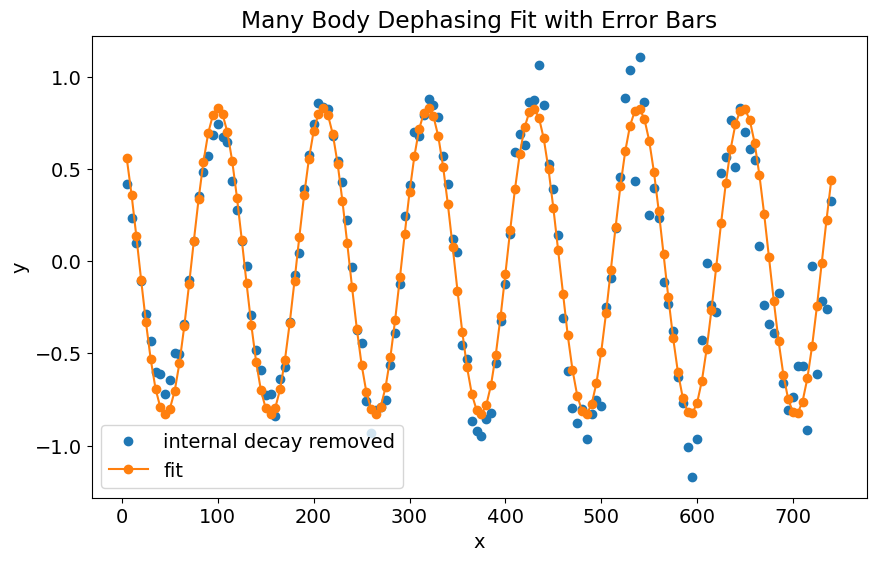

In [328]:
# Assuming pCov is the covariance matrix returned by curve_fit
# Extract the standard deviations (errors) of the parameters
p_errors = np.sqrt(np.diag(pCov))

# Plot the data with error bars
plt.plot(xdata_1, idata1_, 'o', label='internal decay removed')

# Plot the fit with error bars
plt.plot(xdata_1, many_body_dephasing_func(xdata_1, *p_), '-o', label='fit')

# Print all the parameters with their errors
# yscale, decay_T1, decay_mbd, freq, phase_deg, x0
print('yscale: ', p_[0], '±', p_errors[0])
print('decay_mbd: ', p_[1], '±', p_errors[1])
# print('freq: ', p_[3], '±', p_errors[3])
# print('phase_deg: ', p_[4], '±', p_errors[4])
# print('x0: ', p_[2], '±', p_errors[2])

plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Many Body Dephasing Fit with Error Bars')
plt.show()

### With x0 

In [331]:


def many_body_dephasing_func(x, *p, args = [alpha,np.mean(T1s_eff), p_ramsey[1], p_ramsey[2]]):
    '''f(t) = yscale * sin(2*pi*freq*t + phase) * exp(-alpha * exp(-t/decay_T1) * t/decay_mbd)'''
    yscale, decay_mbd, x0 = p
    alpha, decay_T1, freq, phase_deg = args
    return yscale * (np.sin(2 * np.pi * freq * x + phase_deg * np.pi / 180) 
                     * np.exp(-1* alpha* np.exp(-1* (x - x0) / decay_T1) * (x - x0) / decay_mbd))

def fit_many_body_dephasing(xdata, ydata, fitparams=None, bounds=(-np.inf, np.inf)):
    if fitparams is None:
        fitparams = [np.max(ydata), 1000, 1000, 0.1, 0, 0]

    try:
        # print(fitparams)
        # print(xdata.shape, ydata.shape)
        # print(bounds)
        avg_deviation = 1
        while avg_deviation > 0.2:
            pOpt, pCov = sp.optimize.curve_fit(many_body_dephasing_func, xdata, ydata, p0=fitparams, bounds=bounds, maxfev=10000)

            avg_deviation = np.mean(np.abs(ydata - many_body_dephasing_func(xdata, *pOpt)))
            # randomly perturb the initial guess with positive or negative
            fitparams = pOpt 
            print(avg_deviation)
            print(fitparams)
    except RuntimeError:
        print('Error - curve_fit failed')
        pOpt = fitparams
        pCov = np.zeros((len(fitparams), len(fitparams)))
    return pOpt, pCov

# Example usage
T2s = df_t2_and_echo[(df_t2_and_echo['type'] == 'T2')]['t2'].values

# Define bounds for the parameters
lower_bounds = [0.3,10 ,  -5000]
upper_bounds = [2,  5000, 5000]

# Fit the data with bounds
p_, pCov_ = fit_many_body_dephasing(xdata_1, idata1_, fitparams=[1, 1000,  0], bounds=(lower_bounds, upper_bounds))

0.11362958610413437
[ 9.19921971e-01  1.00000024e+01 -3.52023386e+03]


In [299]:
effective_spec_T1

455.79634359556235

yscale:  0.9199219708205986 ± 126142548.40508004
decay_mbd:  10.000002424734097 ± 1.1637626025694463e-05
x0:  -3520.233860286097 ± 1.1130112035254542


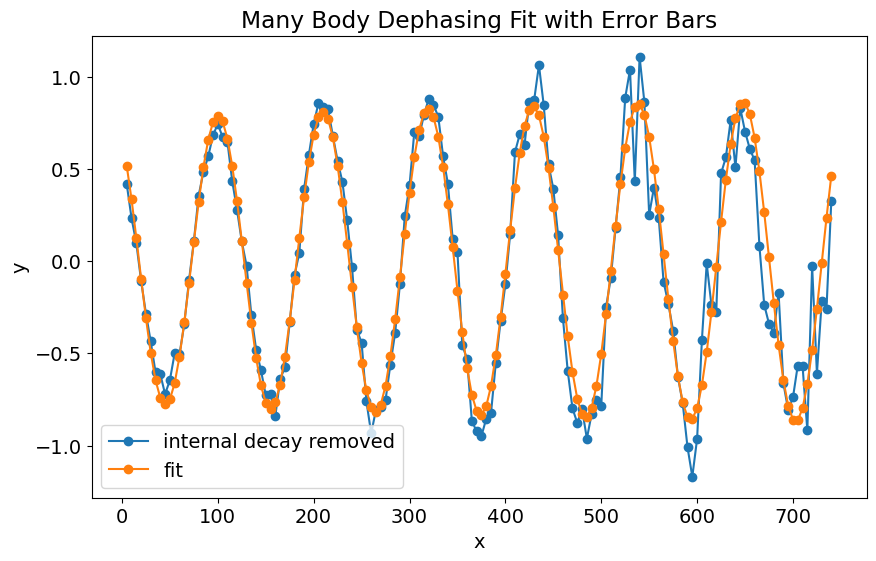

In [333]:
# Assuming pCov is the covariance matrix returned by curve_fit
# Extract the standard deviations (errors) of the parameters
p_errors = np.sqrt(np.diag(pCov))

# Plot the data with error bars
plt.plot(xdata_1, idata1_, '-o', label='internal decay removed')

# Plot the fit with error bars
plt.plot(xdata_1, many_body_dephasing_func(xdata_1, *p_), '-o', label='fit')

# Print all the parameters with their errors
# yscale, decay_T1, decay_mbd, freq, phase_deg, x0
print('yscale: ', p_[0], '±', p_errors[0])
print('decay_mbd: ', p_[1], '±', p_errors[1])
# print('freq: ', p_[3], '±', p_errors[3])
# print('phase_deg: ', p_[4], '±', p_errors[4])
print('x0: ', p_[2], '±', p_errors[2])

plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Many Body Dephasing Fit with Error Bars')
plt.show()

### Fitting both kappa_m and kappa_s

In [227]:
def many_body_dephasing_func(x, *p, args = [alpha, p_ramsey[1], p_ramsey[2]]):
    yscale, decay_T1, decay_mbd, x0 = p
    alpha , freq, phase_deg = args
    return yscale * (np.sin(2 * np.pi * freq * x + phase_deg * np.pi / 180) 
                     * np.exp(-alpha* np.exp(-1* (x - x0) / decay_T1) * (x - x0) / decay_mbd))

def fit_many_body_dephasing(xdata, ydata, fitparams=None, bounds=(-np.inf, np.inf)):
    if fitparams is None:
        fitparams = [np.max(ydata), 1000, 1000, 0.1, 0, 0]

    try:
        # print(fitparams)
        # print(xdata.shape, ydata.shape)
        # print(bounds)
        avg_deviation = 1
        while avg_deviation > 0.2:
            pOpt, pCov = sp.optimize.curve_fit(many_body_dephasing_func, xdata, ydata, p0=fitparams, bounds=bounds, maxfev=10000)

            avg_deviation = np.mean(np.abs(ydata - many_body_dephasing_func(xdata, *pOpt)))
            # randomly perturb the initial guess with positive or negative
            fitparams = pOpt 
            print(avg_deviation)
            print(fitparams)
    except RuntimeError:
        print('Error - curve_fit failed')
        pOpt = fitparams
        pCov = np.zeros((len(fitparams), len(fitparams)))
    return pOpt, pCov

# Example usage
T1s = [358.3, 1254.8, 799.0, 597.4, 355.7, 589.5, 371.2]
T2s = df_t2_and_echo[(df_t2_and_echo['type'] == 'T2')]['t2'].values

# Define bounds for the parameters
lower_bounds = [0.3, 10,10 ,  -300]
upper_bounds = [8, max(T1s), max(T2s), 300]

# Fit the data with bounds
p_, pCov_ = fit_many_body_dephasing(xdata_1, idata1_, fitparams=[1, 200, 1000,  -30], bounds=(lower_bounds, upper_bounds))

0.12753867983535108
[  0.88674623  32.7627651   14.93970767 -27.55935824]


yscale:  0.8867462291306181 ± 7.733118747547055
decay_T1:  32.76276510312704 ± 1.4812668116636866e-05
decay_mbd:  14.939707666918679 ± 1.3987311323249314
x0:  -27.55935824236356 ± 21.497075772041903


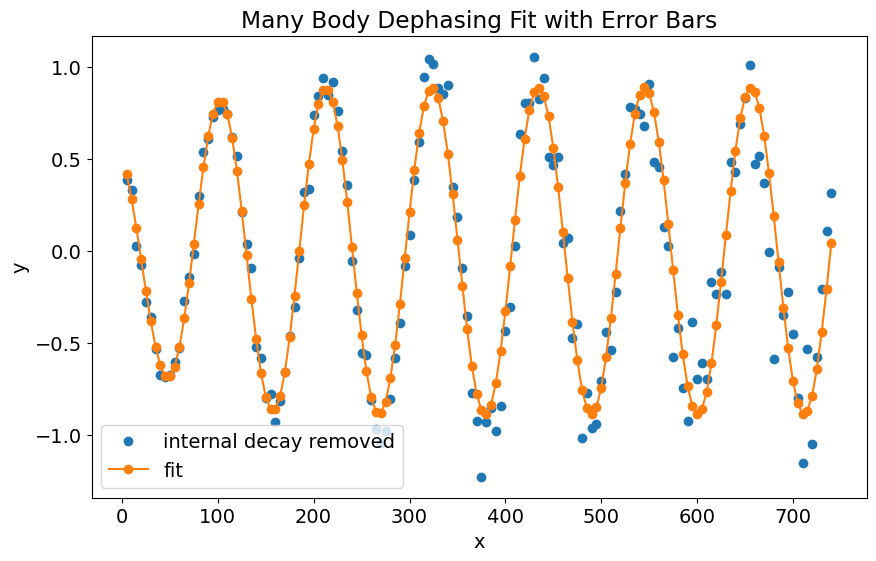

In [228]:
# Assuming pCov is the covariance matrix returned by curve_fit
# Extract the standard deviations (errors) of the parameters
p_errors = np.sqrt(np.diag(pCov))

# Plot the data with error bars
plt.plot(xdata_1, idata1_, 'o', label='internal decay removed')

# Plot the fit with error bars
plt.plot(xdata_1, many_body_dephasing_func(xdata_1, *p_), '-o', label='fit')

# Print all the parameters with their errors
# yscale, decay_T1, decay_mbd, freq, phase_deg, x0
print('yscale: ', p_[0], '±', p_errors[0])
print('decay_T1: ', p_[1], '±', p_errors[1])
print('decay_mbd: ', p_[2], '±', p_errors[2])
# print('freq: ', p_[3], '±', p_errors[3])
# print('phase_deg: ', p_[4], '±', p_errors[4])
print('x0: ', p_[3], '±', p_errors[3])

plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Many Body Dephasing Fit with Error Bars')
plt.show()

### Old analysis

In [115]:
def many_body_dephasing_func(x, *p):
    yscale, decay_T1, decay_mbd, freq, phase_deg, x0 = p
    return yscale * (np.sin(2 * np.pi * freq * x + phase_deg * np.pi / 180) 
                     * np.exp(-1* np.exp(-1* (x - x0) / decay_T1) * (x - x0) / decay_mbd))

def fit_many_body_dephasing(xdata, ydata, fitparams=None, bounds=(-np.inf, np.inf)):
    if fitparams is None:
        fitparams = [np.max(ydata), 1000, 1000, 0.1, 0, 0]

    try:
        # print(fitparams)
        # print(xdata.shape, ydata.shape)
        # print(bounds)
        avg_deviation = 1
        while avg_deviation > 0.1:
            pOpt, pCov = sp.optimize.curve_fit(many_body_dephasing_func, xdata, ydata, p0=fitparams, bounds=bounds)

            avg_deviation = np.mean(np.abs(ydata - many_body_dephasing_func(xdata, *pOpt)))
            # randomly perturb the initial guess with positive or negative
            fitparams = pOpt + avg_deviation*pOpt*np.random.uniform(-0.5, 0.5)
            print(avg_deviation)
            print(fitparams)
    except RuntimeError:
        print('Error - curve_fit failed')
        pOpt = fitparams
        pCov = np.zeros((len(fitparams), len(fitparams)))
    return pOpt, pCov

# Example usage
T1s = [358.3, 1254.8, 799.0, 597.4, 355.7, 589.5, 371.2]
T2s = df_t2_and_echo[(df_t2_and_echo['type'] == 'T2')]['t2'].values

# Define bounds for the parameters
lower_bounds = [0.3, 50,50 , 0.002, -180, -300]
upper_bounds = [2, max(T1s), max(T2s), 0.04, 180, 300]

# Fit the data with bounds
p, pCov = fit_many_body_dephasing(xdata_1, idata1_, fitparams=[0.9, 100, 100, 0.009, 90, -30], bounds=(lower_bounds, upper_bounds))

0.10511700433043765
[ 8.34652573e-01  5.09707841e+01  6.11179013e+01  8.80225946e-03
  1.14380347e+02 -3.67460806e+01]
0.10511700590881946
[ 9.06728147e-01  5.53784492e+01  6.64005523e+01  9.56236146e-03
  1.24257376e+02 -3.99405594e+01]
0.10511709586435587
[ 8.48459440e-01  5.18220165e+01  6.21414515e+01  8.94785456e-03
  1.16272308e+02 -3.73719066e+01]
0.10511645019355133
[ 8.41859331e-01  5.14119828e+01  6.16277436e+01  8.87824036e-03
  1.15367531e+02 -3.70907689e+01]
0.10511683896003843
[ 8.58295159e-01  5.24135029e+01  6.28424388e+01  9.05158994e-03
  1.17620231e+02 -3.77905851e+01]
0.10511695943059551
[ 8.32425694e-01  5.08408736e+01  6.09566485e+01  8.77876665e-03
  1.14074974e+02 -3.66738956e+01]
0.10511656941646427
[ 8.83715798e-01  5.39672517e+01  6.46966703e+01  9.31965988e-03
  1.21103573e+02 -3.89230929e+01]
0.1051170351539289
[ 8.64496302e-01  5.27954998e+01  6.33043916e+01  9.11699355e-03
  1.18470104e+02 -3.80699683e+01]
0.1051171102715698
[ 8.75703727e-01  5.34819192e+

KeyboardInterrupt: 

In [112]:
np.random.uniform(-0.05, 0.05)
#

0.032647858076105804

In [107]:
# check whether p is within bounds
print(p)
print(lower_bounds)
print(upper_bounds)
for i in range(len(p)):
    if p[i] < lower_bounds[i] or p[i] > upper_bounds[i]:
        print('not within bounds')  
        

[0.9, 100, 100, 0.009, 90, -30]
[0.3, 177.85, 50, 0.002, -180, -300]
[2, 1254.8, 1071.0700788320455, 0.04, 180, 300]
not within bounds


yscale:  0.30000000000128557
decay_T1:  330.4367476703105
decay_mbd:  50.000000002257046
freq:  0.024919442662766102
phase_deg:  3.2599886008326915
x0:  -8.760198665741216


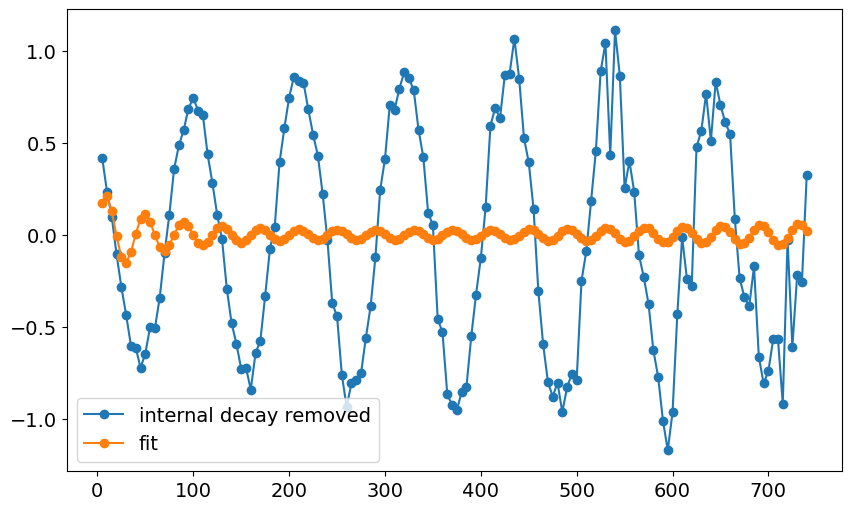

In [72]:
plt.plot(xdata_1, idata1_, '-o', label='internal decay removed')
plt.plot(xdata_1, many_body_dephasing_func(xdata_1, *p), '-o', label='fit')
# print all the parameters
# yscale, decay_T1, decay_mbd, freq, phase_deg, x0
print('yscale: ', p[0])
print('decay_T1: ', p[1])
print('decay_mbd: ', p[2])
print('freq: ', p[3])
print('phase_deg: ', p[4])
print('x0: ', p[5])
plt.legend()


In [104]:
p

[0.9, 100, 100, 0.009, 90, -30]

In [57]:
p

array([ 3.13767059e+02,  9.12452799e-03,  1.21301781e+02,  4.78398801e+02,
       -2.72890935e+01, -1.70560938e+02])

### Manual FItting

Text(0.5, 0.98, 'T_mbd=500 mus')

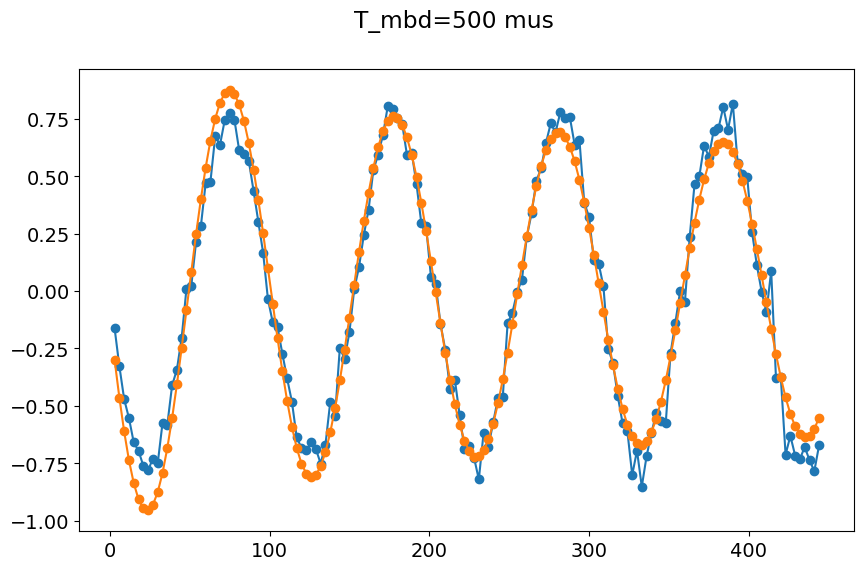

In [316]:
def many_body_dephasing_func(x, *p):
    '''
    $f(t) = e^{-\kappa_{int} t} e^{e^{-\kappa_{s} t} \kappa_m t}$ cos($\omega t$)
    without kappa_int decay
    '''
    yscale, decay_T1, decay_mbd, freq, phase_deg, x0 = p
    return yscale * (np.sin(2 * np.pi * freq * x + phase_deg * np.pi / 180) 
                     * np.exp(-1* np.exp(-1* (x - x0) / decay_T1) * (x - x0) / decay_mbd))

# manual fitting
yscale = 1#p_[0]#0.8278143110603906
decay_T1 = np.mean(T1s_eff)
decay_mbd = 500
freq = p_ramsey[1]
phase_deg = p_ramsey[2]
x0 = 0#p_[3]

p_ = [yscale, decay_T1, decay_mbd, freq, phase_deg, x0]
plt.plot(xdata_1, idata1_, '-o', label='internal decay removed')
plt.plot(xdata_1, many_body_dephasing_func(xdata_1, *p_), '-o', label='fit')
plt.suptitle('T_mbd=' + str(decay_mbd) + ' mus')


# simulation 
Let's see how the ramsey signal would look like if things followed the model

$f(t) = e^{-\kappa_{int} t} e^{e^{-\kappa_{s} t} \kappa_m t}$ cos($\omega t$)

where 
- $\kappa_{int}$ is the intrinsic dephasing rate (T2)
- $\kappa_{s}$ is the T1 decay (average) of spectator storage modes
- $\kappa_m$ is the effective many body dephasing rate
- $\omega$ is the ramsey frequency

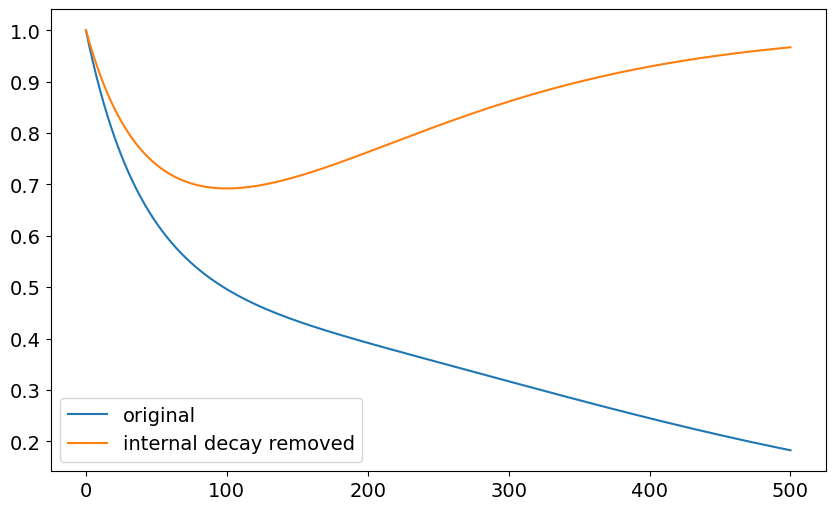

In [49]:
kappa_int = 1/(300) # internal kappa Mhz  
kappa_s = 1/(100) # T1
kappa_mbd = 1/(100) # MBD
omega = 2*np.pi*0#*0.02

def fit_func(t, include_int_kappa = True):

    '''$f(t) = e^{-\kappa_{int} t} e^{e^{-\kappa_{s} t} \kappa_m t}$ cos($\omega t$)'''
    if include_int_kappa:
        return np.exp(-kappa_int*t)*np.exp(-1 *np.exp(-kappa_s*t)*kappa_mbd*t)*np.cos(omega*t)
    else:
        return np.exp(-1 *np.exp(-kappa_s*t)*kappa_mbd*t)*np.cos(omega*t)

t= np.linspace(0, 500, 1000)
plt.plot(t, fit_func(t), label='original')
plt.plot(t, fit_func(t, include_int_kappa=False), label='internal decay removed')
plt.legend()
